In [1]:
import sys
sys.path.append('../')
sys.path.append('../control/')
from control import pure_pursuit

In [2]:
import numpy as np
from vehicle import Vehicle
from track import Track
from simulation import Simulation, show_img

In [3]:
from ipywidgets import RadioButtons
print("Choose visualization option")
viz = RadioButtons(options=['None', 'offline', 'online'],
                   value = 'offline', # default value   
                   description='', disabled=False)
display(viz)

Choose visualization option


RadioButtons(index=1, options=('None', 'offline', 'online'), value='offline')

In [4]:
# set up simulation
wheel_base = 2.65
# TODO: Tune your PID here
Kp, Ki, Kd = 3,0,0
pp = pure_pursuit.PurePursuit(wheel_base=wheel_base, waypoint_shift=0)
#pid = pure_pursuit.PIDController(Kp, Ki, Kd, 0)
#controller = pure_pursuit.PurePursuitPlusPID(pure_pursuit=pp, pid=pid)
vehicle = Vehicle(x=0, y=0, velocity=24.9, heading=0, wheel_base=wheel_base)
sim = Simulation(vehicle, Track(), pp)

In [5]:
# run simulation
from IPython.display import clear_output
img_list = []
for i in range(1,1000):
    try:
        sim.step()
        # visualization
        if viz.value!="None":
          img = sim.cv_plot()
          if i%2==0:
            img_list.append(img)
            if viz.value=="online":
              show_img(img)
          if viz.value=="online":
            clear_output(wait=True)
        # check for simulation end
        if len(sim.waypoints) < 10:
            break

    except KeyboardInterrupt:
        break

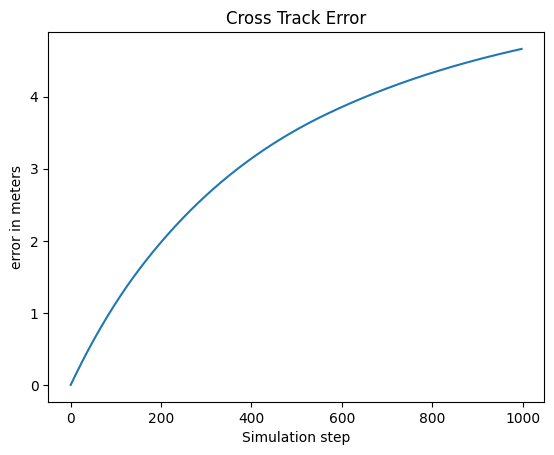

In [6]:
sim.plot_error()

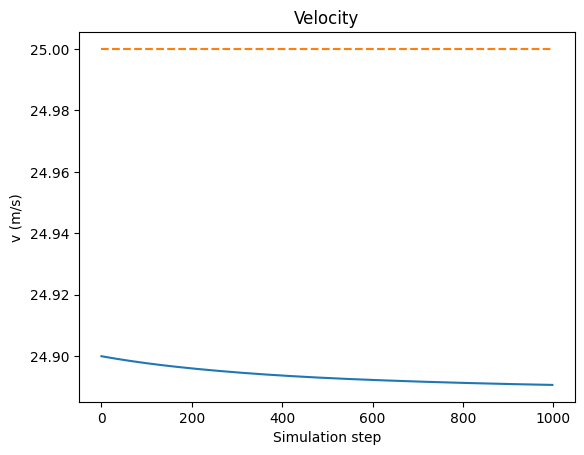

In [7]:
sim.plot_velocity()

In [8]:
import imageio
if viz.value=="None":
  img_list = [np.uint8(np.zeros((100,100,3)))]
imageio.mimsave('control.gif', img_list, fps=20)

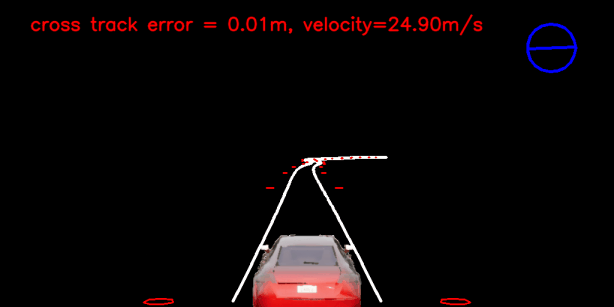

In [9]:
from IPython.display import Image
Image(open('control.gif','rb').read())